Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.1182
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.1753
Epoch 3/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.2167
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.2411
Epoch 5/150
469/469 [=====================

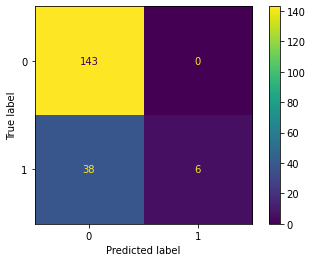

In [ ]:
#load packages and modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#load data
(X_train,Y_train),(X_valid,Y_valid) = mnist.load_data()

#preprocessing the data
X_train =X_train.reshape(60000,784).astype('float32')
X_valid =X_valid.reshape(10000,784).astype('float32')

#normalization
X_train /=255
X_valid /=255

X_valid[0]

#convert the labels to one hot representation.
from keras import utils as np_utils
n_classes=10
Y_train=keras.utils.np_utils.to_categorical(Y_train,n_classes)
Y_valid=keras.utils.np_utils.to_categorical(Y_valid,n_classes)

Y_valid[0]

#Defining the model
model=Sequential()

#Adding dense layer
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

#Adding the final layer
model.add(Dense(10,activation='softmax'))

model.summary()

#compile the network
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

#train
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, Y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_valid, Y_train,Y_valid = train_test_split(X, Y, stratify=Y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()